In [1]:
# importing all the libraries
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

In [2]:
# Reading csv file(dataset)
df = pd.read_csv("SpamSet.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [3]:
# Selecting columns that we need
df = df[["Body","Label"]]

In [4]:
df[df['Label']==1][['Body','Label']]

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1
...,...,...
4995,Subject: rock her world\n,1
4996,Subject: save your smoking\n unsubscribe\n tas...,1
4997,Subject: you can find unimaginable savings on ...,1
4998,Subject: floor heating under tile - easiest sy...,1


In [5]:
# Shape of the dataframe
df.shape

(10000, 2)

In [6]:
# Checking for null values
df.isnull().sum()

Body     0
Label    0
dtype: int64

In [7]:
# Checking for duplicates
df.duplicated().sum()

313

In [8]:
# Dropping the duplicates
df.drop_duplicates(inplace = True)

In [10]:
# Rechecking the shape after removing duplicates
df.shape

(9687, 2)

In [9]:
# Counts of labels
df['Label'].value_counts()

0    4927
1    4760
Name: Label, dtype: int64

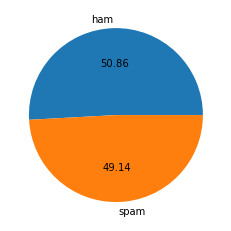

In [10]:
# plotting the types in pie chart format for visualization
plt.pie(df['Label'].value_counts(), labels= ['ham','spam'], autopct ="%0.2f")
plt.show()

### Data processing
    #lower case
    #Tokenization
    #Removing special chars
    #Removing punctuation and stopwords
    #stemming

In [11]:
#importing porter stemmer for  stemming and making it's object
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [12]:
df.head()

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


In [13]:
#cleaning and tokenization of dataframe

def process_clean_body(text):
    
    #lowercase
    text = text.lower()
    
    #punctuation removal
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc).split()
    
    #removing stopwords and tokenization of it
    filtered_words = [ps.stem(word) for word in no_punc if word not in stopwords.words('english')]
    
    return filtered_words

In [14]:
# Applying the changes with map function
df['Transformed_Body'] = df['Body'].map(process_clean_body)

In [15]:
# Data after transformation
df.head()

,Body,Label,Transformed_Body
0,Subject: stock promo mover : cwtd\n * * * urge...,1,"[subject, stock, promo, mover, cwtd, urgent, i..."
1,Subject: are you listed in major search engine...,1,"[subject, list, major, search, engin, submit, ..."
2,"Subject: important information thu , 30 jun 20...",1,"[subject, import, inform, thu, 30, jun, 2005, ..."
3,Subject: = ? utf - 8 ? q ? bask your life with...,1,"[subject, utf, 8, q, bask, life, utf, 8, q, in..."
4,"Subject: "" bidstogo "" is places to go , things...",1,"[subject, bidstogo, place, go, thing, hello, p..."


In [16]:
df.isnull().sum()

Body                0
Label               0
Transformed_Body    0
dtype: int64

In [18]:
# To install wordcloud (for visualization) I needed executable path
# import sys
# print(sys.executable)

In [19]:
from wordcloud import WordCloud
wc = WordCloud(width = 1200, height = 1000, min_font_size = 10, background_color = "white")

In [20]:
# Visualizing the usage of words in spam data
spam_wc = wc.generate(df[df['Label'] == 1]['Body'].str.cat(sep = " "))

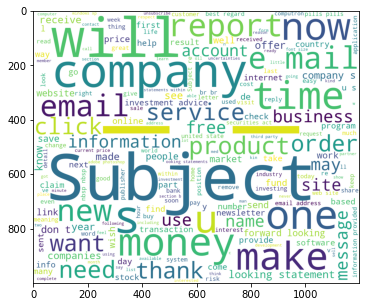

In [21]:
# Plotting the spam wordcloud
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)
plt.show()

In [22]:
# Visualizing the usage of words in ham data
ham_wc = wc.generate(df[df['Label'] == 0]['Body'].str.cat(sep = " "))

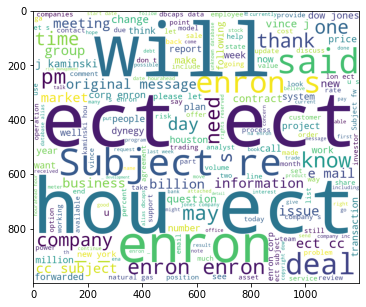

In [23]:
# Plotting the ham wordcloud
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)
plt.show()

In [24]:
# Cleaned and transformed text
df['Transformed_Body']

0       [subject, stock, promo, mover, cwtd, urgent, i...
1       [subject, list, major, search, engin, submit, ...
2       [subject, import, inform, thu, 30, jun, 2005, ...
3       [subject, utf, 8, q, bask, life, utf, 8, q, in...
4       [subject, bidstogo, place, go, thing, hello, p...
                              ...                        
9995    [subject, monday, 22, nd, oct, louis, half, ho...
9996    [subject, miss, bloomberg, deal, stephani, bel...
9997    [subject, eop, salari, survey, questionnair, n...
9998    [subject, q, 3, comparison, hi, louis, compari...
9999    [subject, confidenti, folder, safe, pass, info...
Name: Transformed_Body, Length: 9687, dtype: object

In [25]:
# Spam corpus for visualizing the words usage in spam
spam_corpus = []
for msg in df[df['Label'] == 1]['Transformed_Body']:
    for word in msg:
        spam_corpus.append(word)

In [26]:
len(spam_corpus)

657250

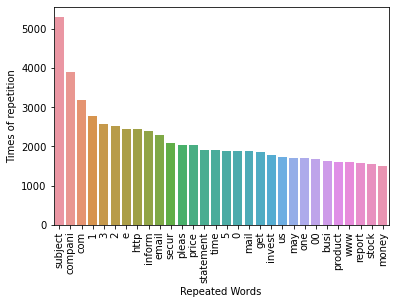

In [32]:
# Plotting the words with frequency which are repeatedly used in case of spam for visualization
import seaborn as sns
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation ='vertical')
plt.xlabel('Repeated Words')
plt.ylabel('Times of repetition')
plt.show()

### Above are the most 30 repeated words used in spam dataset

In [28]:
# Ham corpus for visualizing the words usage in ham
ham_corpus = []
for msg in df[df['Label'] == 0]['Transformed_Body']:
    for word in msg:
        ham_corpus.append(word)

In [29]:
len(ham_corpus)

864437

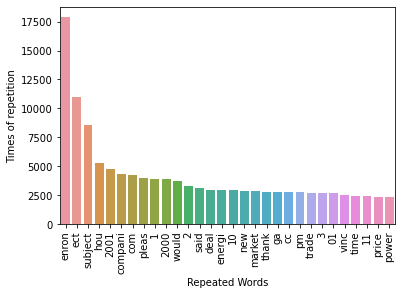

In [31]:
# Plotting the words with frequency which are repeatedly used in case of ham for visualization
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation ='vertical')
plt.xlabel('Repeated Words')
plt.ylabel('Times of repetition')
plt.show()

### Above are the most 30 repeated words used in ham dataset

In [34]:
#Adding columns we need for visualization
df['num_words'] = df['Body'].str.split().str.len()

In [35]:
df['num_chars'] = df['Body'].str.len()

#### Alternative way to sent_tokenize to word, sentence, char counts
import nltk

folder = nltk.data.find(dirpath)

corpusReader = nltk.corpus.PlaintextCorpusReader(folder, '.*\.txt')

print "The number of sentences =", len(corpusReader.sents())

print "The number of patagraphs =", len(corpusReader.paras())

print "The number of words =", len([word for sentence in corpusReader.sents() for word in sentence])

print "The number of characters =", len([char for sentence in corpusReader.sents() for word in sentence for char in word])

In [37]:
# finding the nltk data path
# nltk.data.path

In [38]:
# Download punkt tokenizer
import nltk
# nltk.download('punkt')

In [39]:
df['num_sentences'] = df['Body'].apply(nltk.sent_tokenize).apply(len)

#### Text Vectorization Using BagOfWords, Model building and training

In [40]:
df.head(5)

,Body,Label,Transformed_Body,num_words,num_chars,num_sentences
0,Subject: stock promo mover : cwtd\n * * * urge...,1,"[subject, stock, promo, mover, cwtd, urgent, i...",1098,6210,43
1,Subject: are you listed in major search engine...,1,"[subject, list, major, search, engin, submit, ...",230,898,11
2,"Subject: important information thu , 30 jun 20...",1,"[subject, import, inform, thu, 30, jun, 2005, ...",149,779,13
3,Subject: = ? utf - 8 ? q ? bask your life with...,1,"[subject, utf, 8, q, bask, life, utf, 8, q, in...",119,543,19
4,"Subject: "" bidstogo "" is places to go , things...",1,"[subject, bidstogo, place, go, thing, hello, p...",249,1283,19


In [41]:
#Transforming the data of Transformed_Message such that it can be fed into the model (matrix of tokens)
#(concept of bagOfWords)
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer = process_clean_body).fit_transform(df['Body'])

In [42]:
#spliting the data into 80% train and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(messages_bow, df['Label'] == 1, test_size =.20, random_state = 0)

In [43]:
messages_bow.shape

(9687, 71064)

In [44]:
# Creating and training the Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, Y_train)

In [45]:
#print the predicitons
print(classifier.predict(X_train))

#print the actual values
print(Y_train.values)


[False  True  True ... False  True  True]
[False  True  True ... False  True  True]


In [46]:
# Evaluating the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(Y_train, pred))
print()
print('Confusion matrix: \n', confusion_matrix(Y_train, pred))
print()
print('Accuracy: ', accuracy_score(Y_train, pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3934
        True       0.99      0.99      0.99      3815

    accuracy                           0.99      7749
   macro avg       0.99      0.99      0.99      7749
weighted avg       0.99      0.99      0.99      7749


Confusion matrix: 
 [[3894   40]
 [  42 3773]]

Accuracy:  0.9894179894179894


In [47]:
#print the predictions
print(classifier.predict(X_test))

#print the actual values
print(Y_test.values)

[ True False False ...  True  True  True]
[ True False False ...  True  True  True]


In [48]:
#Evaluating the model on the test dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(Y_test, pred))
print()
print('Confusion matrix: \n', confusion_matrix(Y_test, pred))
print()
print('Accuracy: ', accuracy_score(Y_test, pred))

              precision    recall  f1-score   support

       False       0.98      0.99      0.98       993
        True       0.99      0.98      0.98       945

    accuracy                           0.98      1938
   macro avg       0.98      0.98      0.98      1938
weighted avg       0.98      0.98      0.98      1938


Confusion matrix: 
 [[981  12]
 [ 18 927]]

Accuracy:  0.9845201238390093


### We can see the model is working really good as the value of False positive and False negative is low 
### And the model is over 98% accurate which is good

In [50]:
# Saving the model with pickle library
# import pickle
# filename = 'model.pkl'
# pickle.dump(classifier, open(filename, 'wb'))

In [52]:
# Saving the vectorizer for text processing
# filename = 'vectorizer.pkl'
# pickle.dump(messages_bow, open(filename, 'wb'))